In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/76/9e/4d47a69d3338a00c51535028d25a7d1a17c4762e4a46ae6a577f495de252/opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 2.5 MB/s eta 0:00:16
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.8 MB 4.0 MB/s eta 0:00:10
   -------------------

In [3]:
pip install mediapipe

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/c1/0f/4dc0802131756a9fe4d46d2824352014b85a75baca386cb9e43057f39f15/mediapipe-0.10.14-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/20/11/6667e8a2146d62b7e585c389cc39cede4993f7380101cae052e8dce546c2/jax-0.4.28-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/62/69/91e52043e4dccd200cf2468682e5495fde5d7377470e644ffed47fb5f830/jaxlib-0.4.28-cp311

In [4]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e5a5f4de9c3445dae08a530498e5c53b0e74410eeeb0991c79047/gast-0.5.4-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
#for working with the different arrays and structuring the datasets
import os
#for the easir functioning of the file paths
from matplotlib import pyplot as plt
#for easier visualizing the images
import time
#for the sleep function between the frames
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
#hoistic model for making the detections
mp_drawing = mp.solutions.drawing_utils
#drawing the utilities for drawing them

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #color convvertion
    image.flags.writeable = False
    #making the image not writable
    results = model.process(image)
    #making the prediction
    image.flags.writeable = True
    #making the image writable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #color converstion for making it symmetric
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [6]:
#accesing the webcam for the computer vision
cap = cv2.VideoCapture(0)
#for accessing the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read feed and reading the frame
        ret, frame = cap.read()

        #making the dectections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Drawing landmarks
        draw_styled_landmarks(image, results)
        
        #showing to the screen
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break 
    cap.release()
    cv2.destroyAllWindows()

C:\Users\KIIT\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame,results)

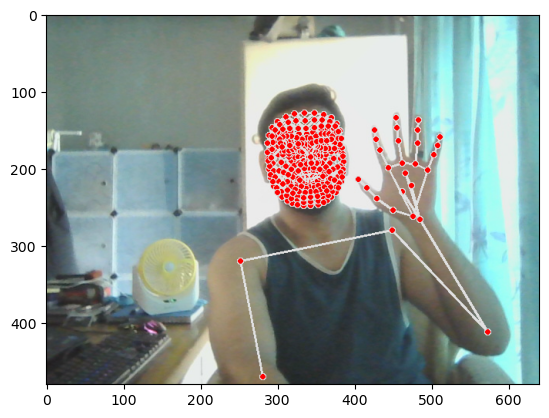

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.53467518,  0.42912132, -0.02560383, ...,  0.57938224,
        0.33947384,  0.02108943])

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)
result_test

array([ 0.53618288,  0.38740951, -0.38980296, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.53618288,  0.38740951, -0.38980296, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
DATA_PATH = os.path.join('MP_Data') #path for the extracted data = numpy arrays
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# Thirty videos worth of data
no_sequences = 30
# Videos are going to be 30 frames in length
sequence_length = 30
# Folder start
start_folder = 30

In [17]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
cap.release()
cv2.destroyAllWindows()

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(5, 3)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [45]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

'hello'

In [46]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - categorical_accuracy: 0.3366 - loss: 1.1918
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.3288 - loss: 2.5362
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.3170 - loss: 1.4552
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.3640 - loss: 1.2795
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 0.3600 - loss: 1.6483
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 0.3190 - loss: 2.6540
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.3189 - loss: 1.0832
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 0.1703 - loss: 1.1210
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 0.3562 - loss: 1.1056
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 0.3386 - loss: 1.0903
Epoch 11/2000
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.4638 - loss: 0.7697
Epoch 63/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.5068 - loss: 0.7511
Epoch 64/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 0.4735 - loss: 0.6666
Epoch 65/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.5499 - loss: 0.6976
Epoch 66/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.7182 - loss: 0.6367
Epoch 67/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.7162 - loss: 0.6001
Epoch 68/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 0.9589 - loss: 0.5844
Epoch 69/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - categorical_accuracy: 0.9765 - loss: 0.5661
Epoch 70/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.9198 - loss: 0.5444
Epoch 71/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.9628 - loss: 0.5700
Epoch 72/2000
3/3 ━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.5206 - loss: 0.9058
Epoch 124/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.5127 - loss: 0.8963
Epoch 125/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.5910 - loss: 0.8744
Epoch 126/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.4403 - loss: 0.9062
Epoch 127/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.6458 - loss: 0.7109
Epoch 128/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 0.6497 - loss: 0.7370
Epoch 129/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 0.7515 - loss: 0.6080
Epoch 130/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.7358 - loss: 0.5679
Epoch 131/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.7123 - loss: 0.5709
Epoch 132/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 0.7711 - loss: 0.5246
Epoch 133/2000
3/3 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 0.8102 - loss: 0.4177
Epoch 185/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.8688 - loss: 0.3749
Epoch 186/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 0.7886 - loss: 0.5626
Epoch 187/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 0.8845 - loss: 0.2368
Epoch 188/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 0.8689 - loss: 0.3167
Epoch 189/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 0.9374 - loss: 0.3186
Epoch 190/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.9413 - loss: 0.1812
Epoch 191/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 0.9648 - loss: 0.1905
Epoch 192/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.9550 - loss: 0.1674
Epoch 193/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - categorical_accuracy: 0.9452 - loss: 0.1757
Epoch 194/2000
3/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 0.9745 - loss: 0.0752
Epoch 246/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.9374 - loss: 0.1162
Epoch 247/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 0.0334
Epoch 248/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 0.0337
Epoch 249/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.9902 - loss: 0.0413
Epoch 250/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 0.0152
Epoch 251/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 0.9824 - loss: 0.0310
Epoch 252/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 0.0168
Epoch 253/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - categorical_accuracy: 1.0000 - loss: 0.0214
Epoch 254/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 0.0120
Epoch 255/2000
3

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 0.0010  
Epoch 307/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - categorical_accuracy: 1.0000 - loss: 0.0012
Epoch 308/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 1.0000 - loss: 9.9492e-04
Epoch 309/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 0.0010  
Epoch 310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 9.6742e-04
Epoch 311/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 9.1541e-04
Epoch 312/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 7.7750e-04
Epoch 313/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 8.9294e-04
Epoch 314/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 8.5024e-04
Epoch 315/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - l

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 4.9930e-04
Epoch 366/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - categorical_accuracy: 1.0000 - loss: 4.3479e-04
Epoch 367/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 1.0000 - loss: 4.5556e-04
Epoch 368/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 5.4237e-04
Epoch 369/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 4.7731e-04
Epoch 370/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 4.1920e-04
Epoch 371/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 5.0036e-04
Epoch 372/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 4.1592e-04
Epoch 373/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 4.3406e-04
Epoch 374/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.00

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 1.0000 - loss: 2.9521e-04
Epoch 425/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 2.9337e-04
Epoch 426/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 3.0035e-04
Epoch 427/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 2.9330e-04
Epoch 428/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 3.3310e-04
Epoch 429/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 2.9401e-04
Epoch 430/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 3.1146e-04
Epoch 431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 1.0000 - loss: 2.7834e-04
Epoch 432/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - categorical_accuracy: 1.0000 - loss: 3.2063e-04
Epoch 433/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 1.0000 - l

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 2.1124e-04
Epoch 484/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 2.0610e-04
Epoch 485/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 2.1961e-04
Epoch 486/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 1.9170e-04
Epoch 487/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.2414e-04
Epoch 488/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.7943e-04
Epoch 489/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.1073e-04
Epoch 490/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.7330e-04
Epoch 491/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.7287e-04
Epoch 492/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.5917e-04
Epoch 543/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.4768e-04
Epoch 544/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.3295e-04
Epoch 545/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.3311e-04
Epoch 546/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.3921e-04
Epoch 547/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.5411e-04
Epoch 548/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.5996e-04
Epoch 549/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.3870e-04
Epoch 550/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.4565e-04
Epoch 551/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.3182e-04
Epoch 602/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.1328e-04
Epoch 603/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - categorical_accuracy: 1.0000 - loss: 9.7247e-05
Epoch 604/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.0613e-04
Epoch 605/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 9.2592e-05
Epoch 606/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.1311e-04
Epoch 607/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.1688e-04
Epoch 608/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 9.2541e-05
Epoch 609/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.1267e-04
Epoch 610/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 9.7511e-05
Epoch 661/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 8.2354e-05
Epoch 662/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - categorical_accuracy: 1.0000 - loss: 8.8222e-05
Epoch 663/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 9.4189e-05
Epoch 664/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 7.8975e-05
Epoch 665/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 7.7408e-05
Epoch 666/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 9.7391e-05
Epoch 667/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 7.9450e-05
Epoch 668/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 8.5747e-05
Epoch 669/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 1.0000 - loss: 6.1465e-05
Epoch 720/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 6.2924e-05
Epoch 721/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 6.1401e-05
Epoch 722/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 7.2236e-05
Epoch 723/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - categorical_accuracy: 1.0000 - loss: 6.4352e-05
Epoch 724/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 6.3070e-05
Epoch 725/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 6.8237e-05
Epoch 726/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 7.7402e-05
Epoch 727/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 7.6223e-05
Epoch 728/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 4.4825e-05
Epoch 779/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 5.6915e-05
Epoch 780/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 5.7980e-05
Epoch 781/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 5.4424e-05
Epoch 782/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 5.1622e-05
Epoch 783/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 5.8973e-05
Epoch 784/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 4.9399e-05
Epoch 785/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 6.0062e-05
Epoch 786/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 5.4391e-05
Epoch 787/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.00

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 4.4091e-05
Epoch 838/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 3.6670e-05
Epoch 839/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 4.4373e-05
Epoch 840/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 4.4333e-05
Epoch 841/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 4.4108e-05
Epoch 842/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 3.8562e-05
Epoch 843/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 4.1852e-05
Epoch 844/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 1.0000 - loss: 4.4561e-05
Epoch 845/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 4.1942e-05
Epoch 846/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 3.7199e-05
Epoch 897/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 3.1496e-05
Epoch 898/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 3.2598e-05
Epoch 899/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 3.6612e-05
Epoch 900/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 3.1964e-05
Epoch 901/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 3.3985e-05
Epoch 902/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 3.3185e-05
Epoch 903/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - categorical_accuracy: 1.0000 - loss: 3.2011e-05
Epoch 904/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 3.7438e-05
Epoch 905/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 2.5633e-05
Epoch 956/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 2.9882e-05
Epoch 957/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 3.1190e-05
Epoch 958/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 2.6735e-05
Epoch 959/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - categorical_accuracy: 1.0000 - loss: 3.1026e-05
Epoch 960/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.9694e-05
Epoch 961/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.6906e-05
Epoch 962/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 2.7842e-05
Epoch 963/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 2.7786e-05
Epoch 964/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 2.4153e-05
Epoch 1015/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 1.0000 - loss: 2.0859e-05
Epoch 1016/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.6008e-05
Epoch 1017/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 2.5588e-05
Epoch 1018/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 2.4726e-05
Epoch 1019/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 2.5696e-05
Epoch 1020/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.6927e-05
Epoch 1021/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 2.4249e-05
Epoch 1022/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 1.0000 - loss: 2.2364e-05
Epoch 1023/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.2283e-05
Epoch 1074/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 1.0000 - loss: 2.1088e-05
Epoch 1075/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 1.0000 - loss: 2.0193e-05
Epoch 1076/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 1.6844e-05
Epoch 1077/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 2.0467e-05
Epoch 1078/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 2.0699e-05
Epoch 1079/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.8522e-05
Epoch 1080/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.1306e-05
Epoch 1081/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.9852e-05
Epoch 1082/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.5523e-05
Epoch 1133/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.6550e-05
Epoch 1134/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.6849e-05
Epoch 1135/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.5208e-05
Epoch 1136/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 1.6993e-05
Epoch 1137/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 1.4643e-05
Epoch 1138/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 1.6432e-05
Epoch 1139/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 1.6333e-05
Epoch 1140/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 1.5319e-05
Epoch 1141/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accur

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 1.3412e-05
Epoch 1192/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 1.3976e-05
Epoch 1193/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 1.4156e-05
Epoch 1194/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 1.3526e-05
Epoch 1195/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.2933e-05
Epoch 1196/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - categorical_accuracy: 1.0000 - loss: 1.3057e-05
Epoch 1197/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.2062e-05
Epoch 1198/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 1.3468e-05
Epoch 1199/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.3281e-05
Epoch 1200/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.0350e-05
Epoch 1251/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - categorical_accuracy: 1.0000 - loss: 1.0858e-05
Epoch 1252/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.0714e-05
Epoch 1253/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.1987e-05
Epoch 1254/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - categorical_accuracy: 1.0000 - loss: 1.1299e-05
Epoch 1255/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 1.2038e-05
Epoch 1256/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 1.0000 - loss: 1.1858e-05
Epoch 1257/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.2829e-05
Epoch 1258/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.0166e-05
Epoch 1259/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 1.0000 - loss: 8.7333e-06
Epoch 1310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 8.2755e-06
Epoch 1311/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 9.7255e-06
Epoch 1312/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 8.7834e-06
Epoch 1313/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 9.2241e-06
Epoch 1314/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 7.7831e-06
Epoch 1315/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 9.1176e-06
Epoch 1316/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 8.7438e-06
Epoch 1317/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 1.0292e-05
Epoch 1318/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accur

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 1.0000 - loss: 7.2429e-06
Epoch 1369/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 7.8724e-06
Epoch 1370/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 6.9269e-06
Epoch 1371/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 7.8516e-06
Epoch 1372/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 1.0000 - loss: 7.5703e-06
Epoch 1373/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 7.6787e-06
Epoch 1374/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 7.1864e-06
Epoch 1375/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - categorical_accuracy: 1.0000 - loss: 7.2527e-06
Epoch 1376/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 8.0277e-06
Epoch 1377/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accura

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 1.0000 - loss: 4.7278e-06
Epoch 1428/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 4.6058e-06
Epoch 1429/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 5.5301e-06
Epoch 1430/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 4.8634e-06
Epoch 1431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 5.1172e-06
Epoch 1432/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 1.0000 - loss: 4.7944e-06
Epoch 1433/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - categorical_accuracy: 1.0000 - loss: 3.8550e-06
Epoch 1434/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 5.0349e-06
Epoch 1435/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 5.2146e-06
Epoch 1436/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 4.6374e-06
Epoch 1487/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 4.3691e-06
Epoch 1488/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - categorical_accuracy: 1.0000 - loss: 3.9312e-06
Epoch 1489/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 3.6972e-06
Epoch 1490/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 4.3421e-06
Epoch 1491/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 4.0934e-06
Epoch 1492/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 3.9141e-06
Epoch 1493/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 4.2998e-06
Epoch 1494/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 3.4770e-06
Epoch 1495/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accur

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - categorical_accuracy: 1.0000 - loss: 3.4360e-06
Epoch 1546/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 3.6101e-06
Epoch 1547/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 3.7160e-06
Epoch 1548/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 1.0000 - loss: 3.4352e-06
Epoch 1549/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 3.1870e-06
Epoch 1550/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 3.5842e-06
Epoch 1551/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 3.2999e-06
Epoch 1552/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 3.2025e-06
Epoch 1553/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 3.5294e-06
Epoch 1554/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - categorical_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - categorical_accuracy: 1.0000 - loss: 3.2294e-06
Epoch 1605/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 3.1072e-06
Epoch 1606/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 2.9737e-06
Epoch 1607/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - categorical_accuracy: 1.0000 - loss: 2.7605e-06
Epoch 1608/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 3.3115e-06
Epoch 1609/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 2.9814e-06
Epoch 1610/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 3.4310e-06
Epoch 1611/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 2.7392e-06
Epoch 1612/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 2.7436e-06
Epoch 1613/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accura

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 3.0163e-06
Epoch 1664/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.7993e-06
Epoch 1665/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 2.7587e-06
Epoch 1666/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 2.8966e-06
Epoch 1667/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 2.4893e-06
Epoch 1668/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 2.6565e-06
Epoch 1669/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 3.1540e-06
Epoch 1670/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 2.4085e-06
Epoch 1671/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 2.6460e-06
Epoch 1672/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 1.0000 - loss: 2.2466e-06
Epoch 1723/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 2.3883e-06
Epoch 1724/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.3113e-06
Epoch 1725/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 2.5490e-06
Epoch 1726/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - categorical_accuracy: 1.0000 - loss: 2.5226e-06
Epoch 1727/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 2.2505e-06
Epoch 1728/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 2.1538e-06
Epoch 1729/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 2.5308e-06
Epoch 1730/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 2.4588e-06
Epoch 1731/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.0234e-06
Epoch 1782/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.9060e-06
Epoch 1783/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 2.1377e-06
Epoch 1784/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 2.1374e-06
Epoch 1785/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 1.9851e-06
Epoch 1786/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 1.9418e-06
Epoch 1787/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 2.2054e-06
Epoch 1788/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 2.3292e-06
Epoch 1789/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - categorical_accuracy: 1.0000 - loss: 1.8184e-06
Epoch 1790/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - categorical_accu

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 1.0000 - loss: 1.5574e-06
Epoch 1841/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - categorical_accuracy: 1.0000 - loss: 1.8657e-06
Epoch 1842/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - categorical_accuracy: 1.0000 - loss: 1.7397e-06
Epoch 1843/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 1.8577e-06
Epoch 1844/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 1.0000 - loss: 1.5981e-06
Epoch 1845/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - categorical_accuracy: 1.0000 - loss: 1.6917e-06
Epoch 1846/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - categorical_accuracy: 1.0000 - loss: 1.4821e-06
Epoch 1847/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.6623e-06
Epoch 1848/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - categorical_accuracy: 1.0000 - loss: 1.6081e-06
Epoch 1849/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - categorical_accurac

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 1.0000 - loss: 1.3639e-06
Epoch 1900/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 1.0000 - loss: 1.4521e-06
Epoch 1901/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - categorical_accuracy: 1.0000 - loss: 1.2931e-06
Epoch 1902/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.3948e-06
Epoch 1903/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.5354e-06
Epoch 1904/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.4421e-06
Epoch 1905/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.4295e-06
Epoch 1906/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 1.3789e-06
Epoch 1907/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - categorical_accuracy: 1.0000 - loss: 1.4041e-06
Epoch 1908/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.2600e-06
Epoch 1959/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 1.2149e-06
Epoch 1960/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 1.0000 - loss: 1.1727e-06
Epoch 1961/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - categorical_accuracy: 1.0000 - loss: 1.3114e-06
Epoch 1962/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 1.0000 - loss: 1.3904e-06
Epoch 1963/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accuracy: 1.0000 - loss: 1.3003e-06
Epoch 1964/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - categorical_accuracy: 1.0000 - loss: 1.2344e-06
Epoch 1965/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - categorical_accuracy: 1.0000 - loss: 1.2181e-06
Epoch 1966/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - categorical_accuracy: 1.0000 - loss: 1.1363e-06
Epoch 1967/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - categorical_accur

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [39]:
actions[np.argmax(res[4])]

'hello'

In [40]:
actions[np.argmax(y_test[4])]

'thanks'

In [42]:
model.save('action.h5')

In [43]:
del model

In [48]:
model.load_weights('action.h5')

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [71]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 4],
        [0, 1]],

       [[2, 0],
        [3, 0]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [73]:
accuracy_score(ytrue, yhat)

0.2

In [90]:
from scipy import stats

In [91]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [92]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionO

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.Solution

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
hello


In [93]:
cap.release()
cv2.destroyAllWindows()

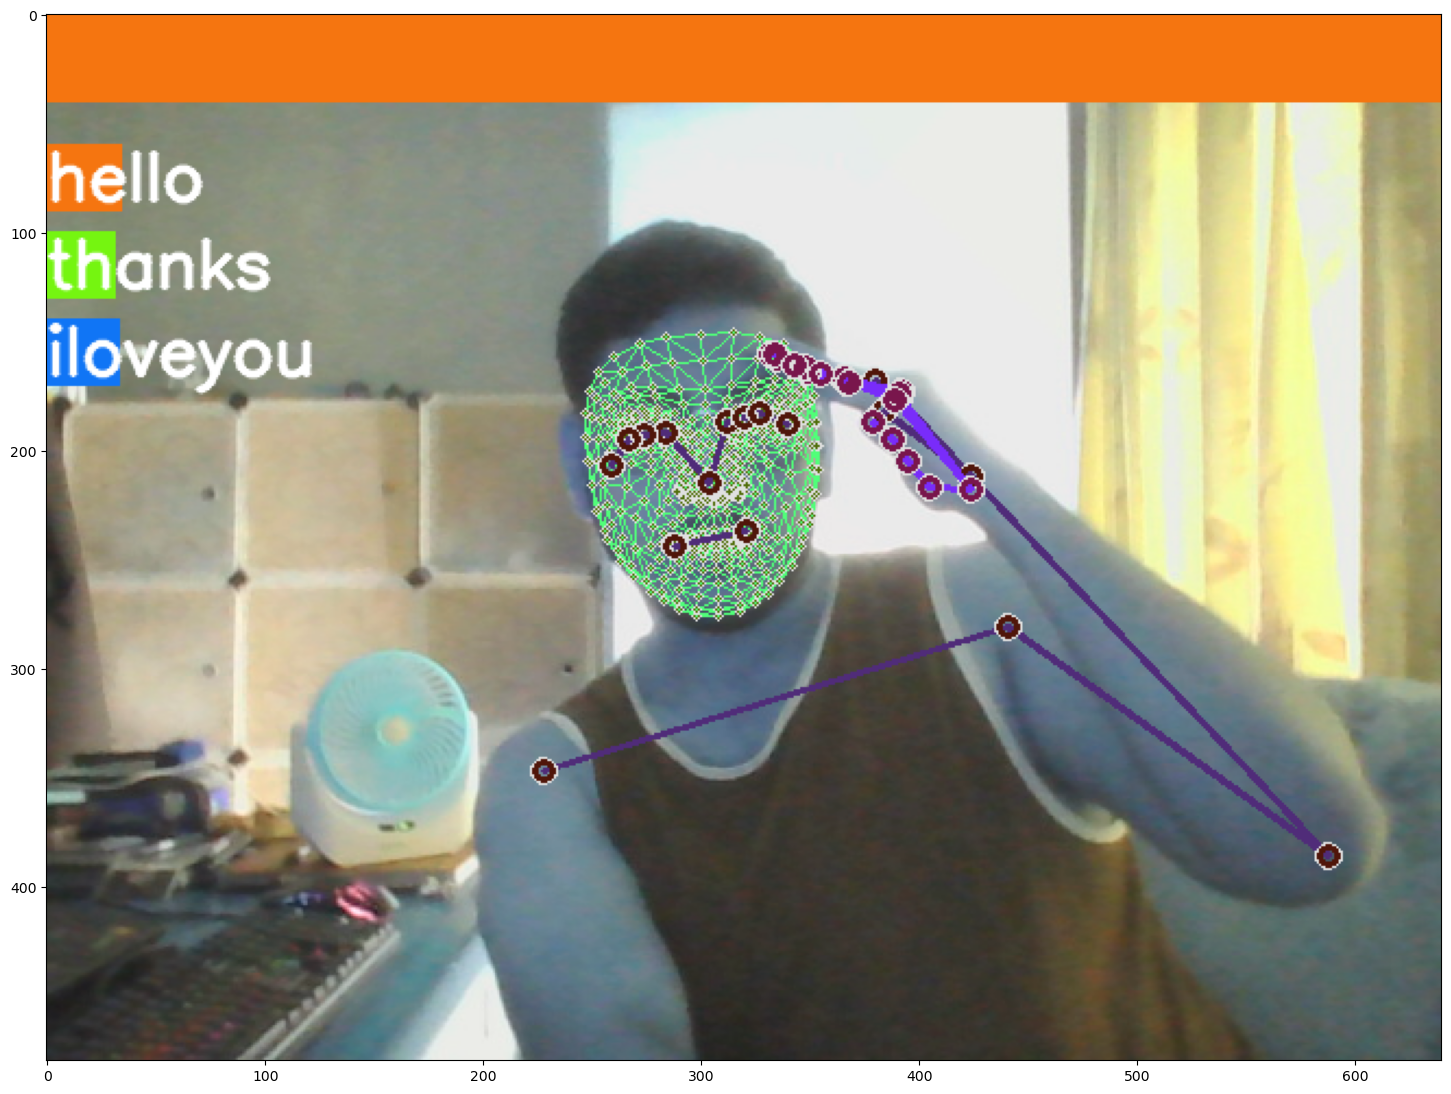

In [94]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))